In [108]:
# Import pandas, numpy and seaborn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql


from joblib import load,dump
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns',None)


In [109]:
# Define the path to the SQLite database file

#Roberto file path to DB
#db_path = 'C:/Users/rober/SQLite/CyberSentryDB.db'

#Andres file path to DB
db_path = 'C:/Users/andre/SQLite/CyberSentryDB.db'

# Establish a connection to the database specified by db_path
conn = sql.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SQL query to select all records from the 'network_activity' table
# and store the result in a pandas DataFrame 'df' for further analysis
#df = pd.read_sql_query("SELECT * FROM network_activity", conn)
df_test = pd.read_sql_query("SELECT * FROM testing_data", conn)
df_train = pd.read_sql_query("SELECT * FROM training_data", conn)

# Close the cursor to release database resources
cursor.close()

# Close the connection to the database to ensure data integrity and release resources
conn.close()


In [110]:
columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome',
    'level'
]


# Assign name for columns
df_train.columns = columns
df_test.columns = columns

In [111]:
# Concatenate dataframes
df_all = pd.concat([df_train, df_test], ignore_index=True)

# Optionally, if you want to drop the old index and not add it as a column
df_all = df_all.reset_index(drop=True)

In [112]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [113]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [114]:
df_all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [115]:
print(f"numbers of protocol_type: {len(df_train['protocol_type'].value_counts())}")
print(f"number of 'service' in train datasets: {len(df_train.service.value_counts())}")
print(f"number of 'flag' in train datasets: {len(df_train['flag'].value_counts())}")

numbers of protocol_type: 3
number of 'service' in train datasets: 70
number of 'flag' in train datasets: 11


In [116]:
new_df = pd.concat([df_test['service'].value_counts(), df_train['service'].value_counts()], axis=1)
# new_df.rename(columns={'service':'KDDTest+', 'service':'KDDTrain+'}, inplace=True)
new_df.columns=['KDDTest+', 'KDDTrain+']

new_df.sort_values(by='KDDTest+', ascending=False).head(10)

,KDDTest+,KDDTrain+
service,,
http,7853.0,40338
private,4774.0,21853
telnet,1626.0,2353
pop_3,1019.0,264
smtp,934.0,7313
domain_u,894.0,9043
ftp_data,851.0,6860
other,838.0,4359
ecr_i,752.0,3077


In [117]:
new_df.sort_values(by='KDDTest+', ascending=False).head(10)


,KDDTest+,KDDTrain+
service,,
http,7853.0,40338
private,4774.0,21853
telnet,1626.0,2353
pop_3,1019.0,264
smtp,934.0,7313
domain_u,894.0,9043
ftp_data,851.0,6860
other,838.0,4359
ecr_i,752.0,3077


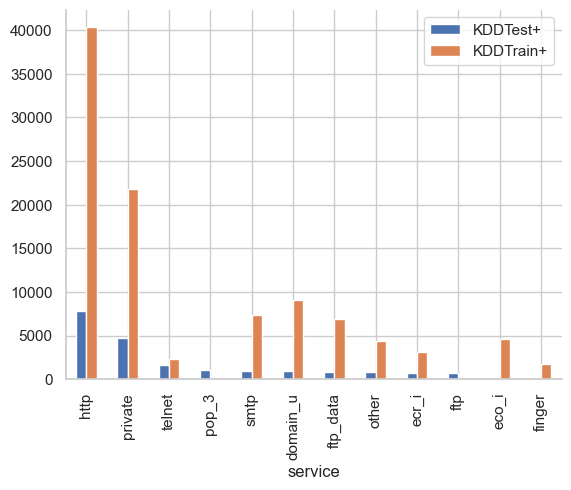

In [118]:
ax = pd.concat([df_test['service'].value_counts().head(10),df_train['service'].value_counts().head(10)],axis=1).plot(kind='bar')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(['KDDTest+', 'KDDTrain+'])
plt.show()

In [119]:
test_top10 = df_test['service'].value_counts().head(10)
train_top10 = df_train['service'].value_counts().head(10)

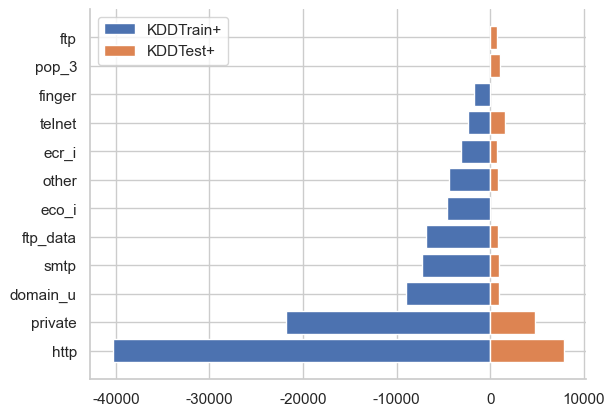

In [120]:
fig, ax = plt.subplots()
plt.rcParams['axes.unicode_minus']=False
plt.barh(train_top10.index, -train_top10)
plt.barh(test_top10.index, test_top10)

# df_train['service'].value_counts().head(10).plot(kind='barh', ax=ax1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(['KDDTrain+','KDDTest+'])
plt.show()

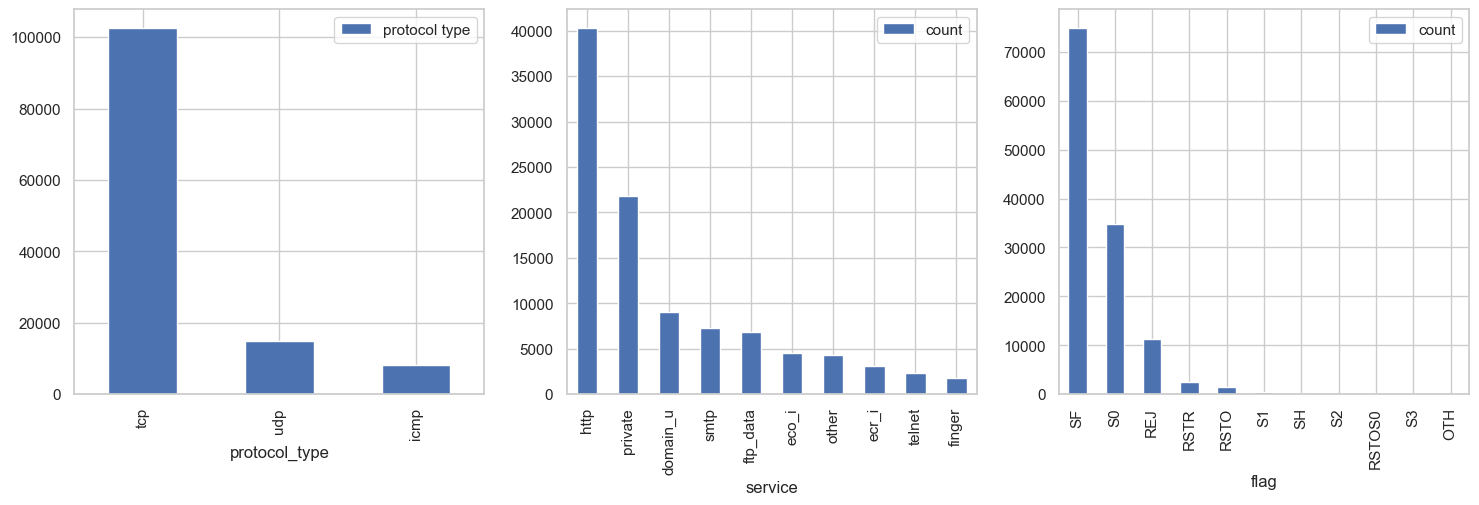

In [121]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
df_train["protocol_type"].value_counts().plot(kind='bar', label='protocol type')
plt.legend()
plt.subplot(132)
df_train['service'].value_counts().head(10).plot(kind='bar')
plt.legend()
plt.subplot(133)
df_train["flag"].value_counts().plot(kind='bar')
plt.legend()
plt.show()

In [122]:
df_train.outcome.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [123]:
class_DoS = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 
             'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm']
class_Probe = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']

class_U2R = ['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm']

class_R2L = ['ftp_write', 'guess_passwd', 'httptunnel',  'imap', 'multihop', 'named', 
             'phf', 'sendmail', 'snmpgetattack', 'spy', 'snmpguess', 'warezclient', 
             'warezmaster', 'xlock', 'xsnoop']

class_attack = class_DoS + class_Probe + class_U2R + class_R2L

In [124]:
df_train['class'] = df_train['outcome']
df_train['class'].replace(class_attack, value='attack', inplace=True)

print(df_train['class'].unique())
df_train.drop(columns=["outcome", "level"], inplace =True)

['normal' 'attack']


C:\Users\andre\AppData\Local\Temp\ipykernel_24492\1440853049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['class'].replace(class_attack, value='attack', inplace=True)


In [125]:
df_train.shape

(125973, 42)

In [126]:
df_test['class'] = df_test['outcome']
df_test['class'].replace(class_attack, value='attack', inplace=True)

df_test.drop(columns=["outcome", "level"], inplace =True)
print(df_test['class'].unique())

['attack' 'normal']


C:\Users\andre\AppData\Local\Temp\ipykernel_24492\1638885752.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['class'].replace(class_attack, value='attack', inplace=True)


In [127]:
df_test.shape

(22544, 42)

class
normal    67343
attack    58630
Name: count, dtype: int64


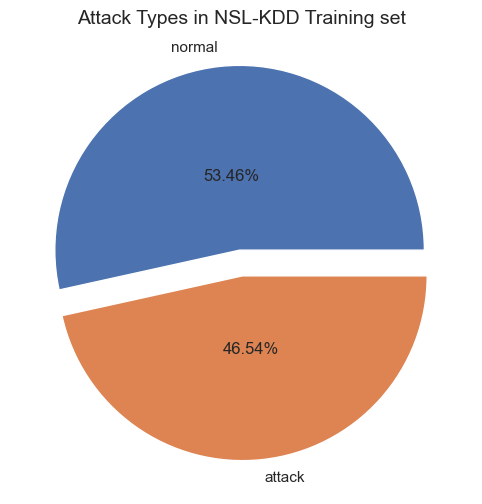

In [128]:
pie, ax = plt.subplots(figsize=[10,6])
class_data = df_train['class'].value_counts().sample(frac=1.0)
print(class_data)

ax.pie(x=class_data, labels=class_data.keys(), explode=[0.07]*len(class_data), pctdistance=0.4, autopct="%.2f%%")
ax.set_title("Attack Types in NSL-KDD Training set", fontdict={'fontsize': 14})
plt.show()

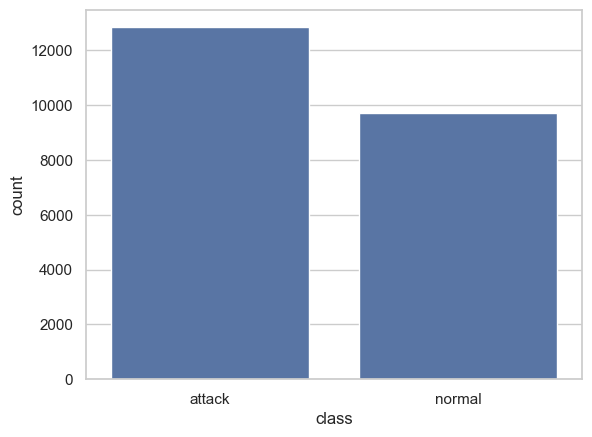

In [129]:
sns.countplot(x=df_test['class']);

In [130]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

------------------------------

# **4. Preprocessing the Data**

## 4.1. Scaling the Data

In [131]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,attack
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,attack
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,attack
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,attack


In [132]:
drop_columns = ['srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_same_srv_rate',
 'num_root',
 'num_outbound_cmds',
 'su_attempted']

def preprocess(dataframe, to_drop_columns):
    
    x = dataframe.drop(columns=["class"])
    x = x.drop(columns = to_drop_columns)

    x_num = x.select_dtypes(exclude='object')

    y = dataframe["class"]
    
    return x, x_num, y

In [133]:
X_train, X_train_num, Y_train = preprocess(df_train, drop_columns)

x_test, x_test_num, y_test = preprocess(df_test, drop_columns)

print(X_train.shape, X_train_num.shape, Y_train.shape, x_test.shape, x_test_num.shape, y_test.shape)

(125973, 31) (125973, 28) (125973,) (22544, 31) (22544, 28) (22544,)


In [134]:
le = LabelEncoder()

Y_train_label = le.fit_transform(Y_train)

y_test_label = le.transform(y_test) #hello

n_classes = len(le.classes_)

print(f"num of classes:{n_classes}")

print(le.classes_)

num of classes:2
['attack' 'normal']


In [135]:
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):

    # Fit the model using the training data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_precision = precision_score(y_train, y_pred_train, average='macro')
    test_precision = precision_score(y_test, y_pred_test, average='macro')
    train_recall = recall_score(y_train, y_pred_train, average='macro')
    test_recall = recall_score(y_test, y_pred_test, average='macro')


    # Output metrics
    print(f"Training Accuracy {name}: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy {name}: {test_accuracy*100:.2f}%")
    print(f"Training Precision {name}: {train_precision*100:.2f}%")
    print(f"Test Precision {name}: {test_precision*100:.2f}%")
    print(f"Training Recall {name}: {train_recall*100:.2f}%")
    print(f"Test Recall {name}: {test_recall*100:.2f}%")

    # Display confusion matrix
    confusion_mtx = confusion_matrix(y_test, y_pred_test)
    display_labels = ['Normal', 'Attack']
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=display_labels)
    fig, ax = plt.subplots(figsize=(10,10))
    cm_display.plot(ax=ax)
    plt.grid(False)
    plt.show()

    return model

# You will call the evaluate_classification function like this, for example:
# evaluate_classification(your_model, 'Your Model Name', X_train, X_test, y_train_class, y_test_class)


Training Accuracy Logistic Regression: 94.32%
Test Accuracy Logistic Regression: 74.99%
Training Precision Logistic Regression: 94.31%
Test Precision Logistic Regression: 78.39%
Training Recall Logistic Regression: 94.27%
Test Recall Logistic Regression: 77.21%


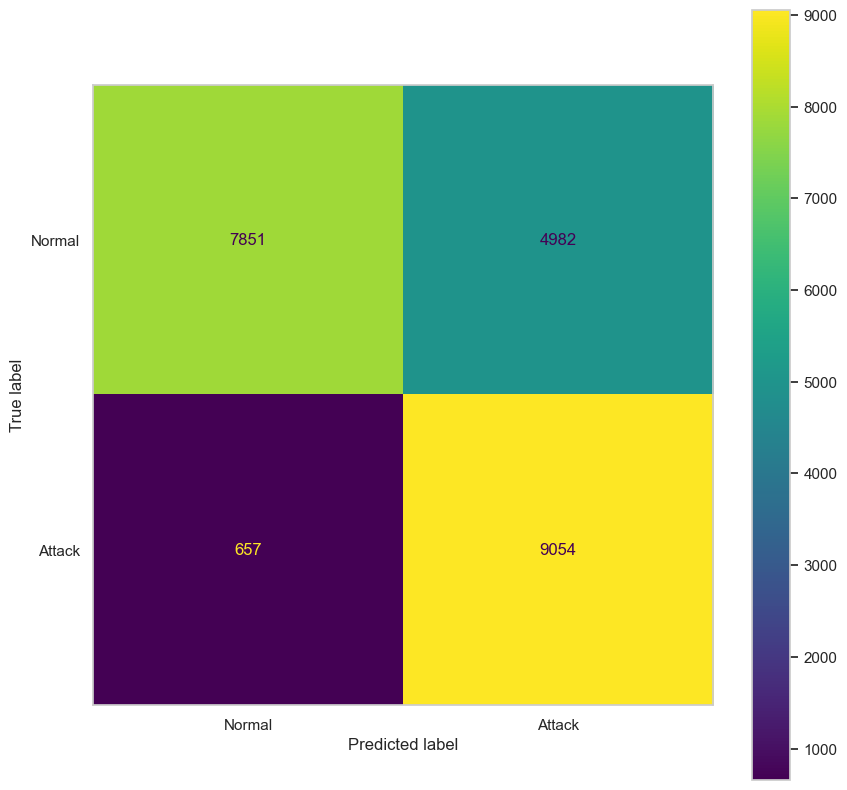

Cross-Validation Accuracy Scores: [0.94173447 0.94232983 0.94554475 0.94284353 0.94379614]
Mean CV Accuracy: 0.94, Standard Deviation in CV Accuracy: 0.00


In [136]:
# Initialize Logistic Regression model with various parameters
lr = LogisticRegression(
    penalty='l2',                # Specifies the norm used in the penalization (regularization). 'l2' is the standard L2 regularization.
    tol=1e-4,                    # Tolerance for stopping criteria. This tells the model when to stop searching for a minimum (convergence).
    C=1,                       # Inverse regularization strength. Smaller values specify stronger regularization.
    fit_intercept=True,          # Specifies if a constant (bias or intercept) should be added to the decision function.
    class_weight=None,           # Weights associated with classes. If None, all classes are supposed to have weight one.
    random_state=42,           # The seed used by the random number generator (for shuffling the data).
    solver='newton-cg',                # Algorithm to use in the optimization problem. For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.
    max_iter=10000,              # Maximum number of iterations for the solvers to converge.
    n_jobs=8,                 # Number of CPU cores used when parallelizing. None means 1 unless in a joblib.parallel_backend context.
    l1_ratio=None                # The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.
)

# Evaluate the fitted model's performance on both the training and testing datasets
# The 'evaluate_classification' function prints out several metrics and displays a confusion matrix
lr = evaluate_classification(lr, "Logistic Regression", X_train_num, x_test_num, Y_train_label, y_test_label)

# Perform 5-fold cross-validation to assess model's stability and performance across different subsets of the data
# Cross-validation is crucial for verifying the model's ability to generalize to unseen data
cv_scores = cross_val_score(lr, X_train_num, Y_train_label, cv=5, scoring='accuracy')

# Print the accuracy scores obtained from cross-validation
# These scores provide insight into how the model performs on different folds of the training data
print("Cross-Validation Accuracy Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores to get an overall performance metric and its variability
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()
print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}, Standard Deviation in CV Accuracy: {std_cv_accuracy:.2f}")


In [137]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,0.0,0.14,0.06,0.00,255,25,0.06,0.00,0.00
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,255,244,0.01,0.01,0.00
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.00,0.00,0.00,255,30,0.06,0.00,0.00
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,0.0,0.06,0.05,0.00,255,8,0.05,0.00,0.00


Training Accuracy RandomForestClassifier: 99.99%
Test Accuracy RandomForestClassifier: 75.88%
Training Precision RandomForestClassifier: 99.99%
Test Precision RandomForestClassifier: 80.71%
Training Recall RandomForestClassifier: 99.99%
Test Recall RandomForestClassifier: 78.50%


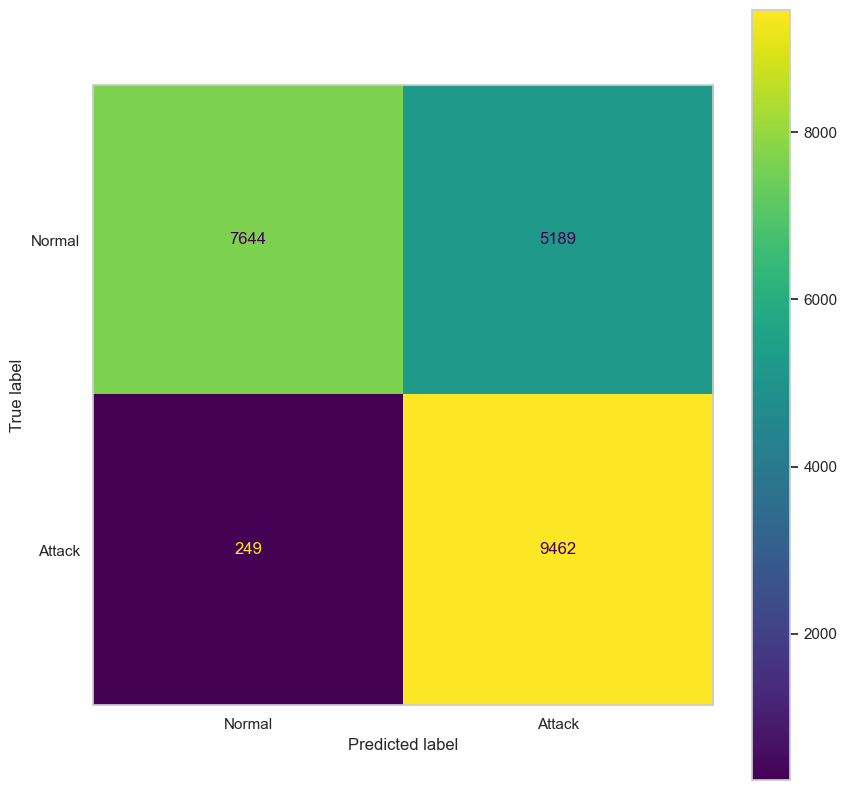

1) src_bytes                      0.235657
2) dst_bytes                      0.155544
3) diff_srv_rate                  0.094152
4) same_srv_rate                  0.080427
5) dst_host_srv_count             0.068289
6) logged_in                      0.064610
7) count                          0.056780
8) dst_host_diff_srv_rate         0.050662
9) dst_host_same_src_port_rate    0.038942
10) serror_rate                    0.038353
11) dst_host_srv_diff_host_rate    0.029960
12) srv_count                      0.025501
13) dst_host_count                 0.018041
14) hot                            0.010328
15) rerror_rate                    0.008669
16) num_compromised                0.006459
17) duration                       0.005276
18) wrong_fragment                 0.005254
19) srv_diff_host_rate             0.004938
20) is_guest_login                 0.001262
21) num_failed_logins              0.000346
22) num_file_creations             0.000221
23) root_shell                     0.0001

In [138]:
# Initialize the RandomForestClassifier with various parameters
rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest.
    criterion='gini',        # The function to measure the quality of a split. 'gini' for Gini impurity and 'entropy' for information gain.
    max_depth=None,          # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2,     # The minimum number of samples required to split an internal node.
    min_samples_leaf=1,      # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    max_leaf_nodes=None,     # Grow trees with `max_leaf_nodes` in best-first fashion. Best nodes are defined as relative reduction in impurity.
    min_impurity_decrease=0.0, # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    bootstrap=True,          # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    oob_score=False,         # Whether to use out-of-bag samples to estimate the generalization accuracy.
    n_jobs=-1,             # The number of jobs to run in parallel. None means 1. -1 means using all processors.
    random_state=None,       # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node.
    verbose=0,               # Controls the verbosity when fitting and predicting.
    warm_start=False,        # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
    class_weight=None,       # Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.
    ccp_alpha=0.0,           # Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than `ccp_alpha` will be chosen.
    max_samples=None         # If bootstrap is True, the number of samples to draw from X to train each base estimator.
)

# Use the function to fit the model and evaluate it
random_f = evaluate_classification(rf, "RandomForestClassifier", X_train_num, x_test_num, Y_train_label, y_test_label)

# Now you can safely access feature_importances_ without an error
importance = random_f.feature_importances_
indices = np.argsort(importance)[::-1]
features = X_train_num.columns

# Show the importance scores
for f in range(X_train_num.shape[1]):
    print(f"{f + 1}) {features[indices[f]]:<30} {importance[indices[f]]:.6f}")



# Perform 5-fold cross-validation to assess model's stability and performance across different subsets of the data
# Cross-validation is crucial for verifying the model's ability to generalize to unseen data
#cv_scores = cross_val_score(rf, X_train_reduced, Y_train, cv=5, scoring='accuracy')

# Print the accuracy scores obtained from cross-validation
# These scores provide insight into how the model performs on different folds of the training data
#print("Cross-Validation Accuracy Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores to get an overall performance metric and its variability
#mean_cv_accuracy = cv_scores.mean()
#std_cv_accuracy = cv_scores.std()
#print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}, Standard Deviation in CV Accuracy: {std_cv_accuracy:.2f}")

In [139]:
# Assuming your RandomForestClassifier is trained and stored in 'rf'
dump(random_f, 'random_forest_classifier.joblib')

['random_forest_classifier.joblib']

In [140]:
model_path = 'random_forest_classifier.joblib'

RandomForestClassifier = load(model_path)



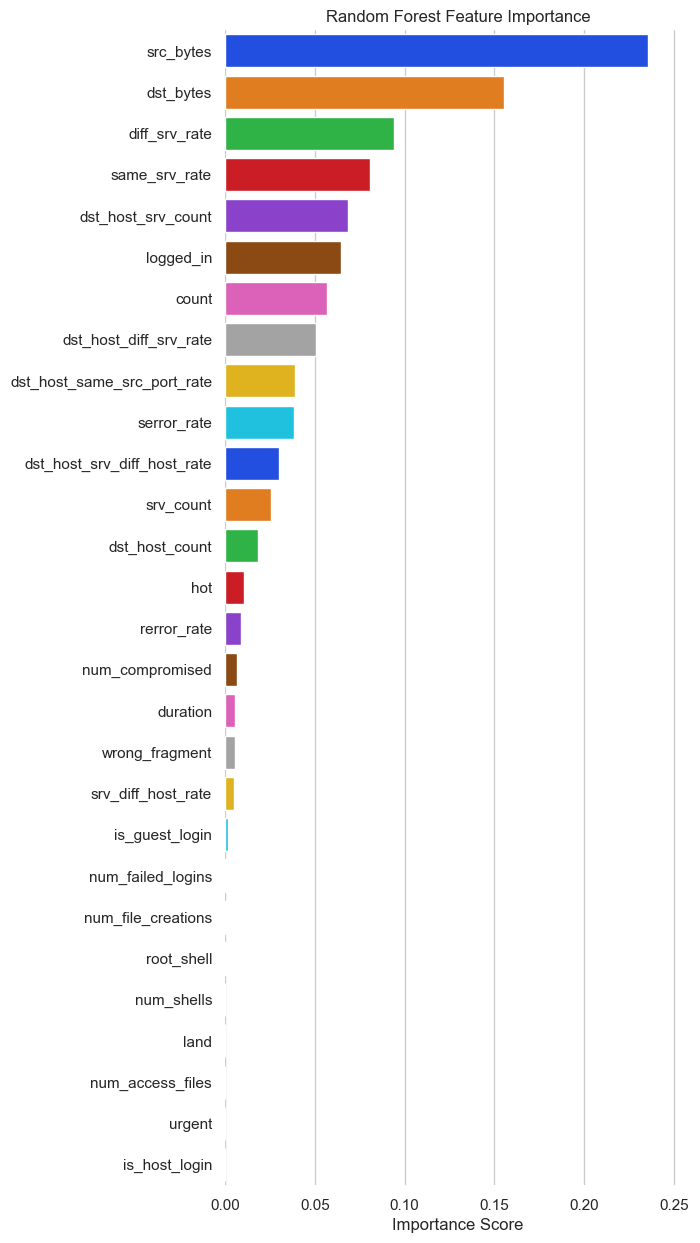

In [141]:
importance_list = sorted(list(zip(importance, features)), reverse=True)
importance_scores, feature_names = [s[0] for s in importance_list], [s[1] for s in importance_list]

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("muted")

# Use a sequential palette and apply it with the 'palette' parameter
# 'rocket' is just one example of a sequential palette; you can choose another based on your preference
sns.barplot(x=importance_scores, y=feature_names, hue=feature_names, palette='bright', ax=ax, legend=False)

# Set coordinate information
ax.set(xlim=(0, max(importance_scores) * 1.1), ylabel="", xlabel="Importance Score", title="Random Forest Feature Importance")
sns.despine(left=True, bottom=True)

plt.show()

In [33]:
forest_importances = pd.Series(importance_scores, index=feature_names)
top_forest_importances = forest_importances.sort_values(ascending=False)[:19]

list(top_forest_importances.index)


X_train_obj= X_train.select_dtypes(include='object')

X_train = X_train.loc[:, list(top_forest_importances.index)+list(X_train_obj.columns)]
X_train

,src_bytes,dst_bytes,same_srv_rate,diff_srv_rate,dst_host_srv_count,logged_in,dst_host_diff_srv_rate,dst_host_same_src_port_rate,count,serror_rate,dst_host_srv_diff_host_rate,dst_host_count,srv_count,rerror_rate,hot,srv_diff_host_rate,num_compromised,duration,wrong_fragment,protocol_type,service,flag
0,491,0,1.00,0.00,25,0,0.03,0.17,2,0.0,0.00,150,2,0.0,0,0.00,0,0,0,tcp,ftp_data,SF
1,146,0,0.08,0.15,1,0,0.60,0.88,13,0.0,0.00,255,1,0.0,0,0.00,0,0,0,udp,other,SF
2,0,0,0.05,0.07,26,0,0.05,0.00,123,1.0,0.00,255,6,0.0,0,0.00,0,0,0,tcp,private,S0
3,232,8153,1.00,0.00,255,1,0.00,0.03,5,0.2,0.04,30,5,0.0,0,0.00,0,0,0,tcp,http,SF
4,199,420,1.00,0.00,255,1,0.00,0.00,30,0.0,0.00,255,32,0.0,0,0.09,0,0,0,tcp,http,SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0.14,0.06,25,0,0.06,0.00,184,1.0,0.00,255,25,0.0,0,0.00,0,0,0,tcp,private,S0
125969,105,145,1.00,0.00,244,0,0.01,0.01,2,0.0,0.00,255,2,0.0,0,0.00,0,8,0,udp,private,SF
125970,2231,384,1.00,0.00,30,1,0.06,0.00,1,0.0,0.00,255,1,0.0,0,0.00,0,0,0,tcp,smtp,SF
125971,0,0,0.06,0.05,8,0,0.05,0.00,144,1.0,0.00,255,8,0.0,0,0.00,0,0,0,tcp,klogin,S0


In [107]:
X_normal = X_train[y_train=='normal']
print(X_normal.shape)
X_normal_new = X_normal.copy()
outlier_fence = X_normal.quantile(0.95)
for column, fence in outlier_fence.items():
    boolarr = X_normal_new.loc[:, column] <= fence
    X_normal_new = X_normal_new[boolarr]
print(X_normal_new.shape)
# X_train_new = X_train.copy()
X_train.drop(index=X_normal.index, inplace=True)
print(X_train.shape)
X_train = X_train.append(X_normal_new).sort_index()
y_train = y_train[X_train.index]
print(X_train.shape)
print(y_train.shape)

NameError: name 'y_train' is not defined

In [ ]:
X_train.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def tune_random_forest(X_train, y_train, X_test, y_test, param_grid, cv=5):
    """
    Tune a RandomForestClassifier based on a given set of parameters.

    :param X_train: Training features
    :param y_train: Training target
    :param X_test: Test features
    :param y_test: Test target
    :param param_grid: Dictionary with parameters names (`str`) as keys and lists of parameter settings to try as values
    :param cv: Number of cross-validation folds
    :return: The best estimator from the grid search
    """
    # Initialize the RandomForestClassifier
    rf = RandomForestClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=4, verbose=30)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Predict on the test set using the best found parameters
    y_pred_test = grid_search.best_estimator_.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred_test))

    # Return the best estimator
    return grid_search.best_estimator_, grid_search.cv_results_


# Define a more granular parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]                   # Including both options for bootstrapping samples
}

# Call the function
best_rf, cv_results = tune_random_forest(X_train_reduced, Y_train, x_test_reduced, y_test, param_grid)